# 환경 설정
matplotlib 임포트할 때 계속 오류가 나서 재설치 했습니다

In [6]:
!pip uninstall -y matplotlib

In [7]:
! pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)


In [9]:
# import shutil
# shutil.rmtree('./added_flowers_img')
# print(os.path.exists("./added_flowers_img"))

# 데이터 로드

- 후보 바뀌기 전 데이터라 교체해야되긴하는데 일단 코드 잘 동작하나 확인용으로 가져왔습니다.
- 6.14 작업 내용 
  - 데이터 후보 30개 정해진걸로 교체
  - 압축 해제하면 파일 이름 깨지는 경우 확인
  - Unknown image file format. One of JPEG, PNG, GIF, BMP required. 오류 확인 -> webp가 중간에 껴있는 경우가 있는데 그거 때문인거 같음
  - webp 같은 지원하지 않는 파일 직접 찾아서 지움

In [10]:
from zipfile import ZipFile
test_file_name = "./data/added_flowers_img.zip"

# 폴더 이름이 ░ó╜├║╫▓╔ 이런식으로 깨져서 디코딩 옵션 추가

with ZipFile(test_file_name, 'r') as zip:
#     zip.printdir()
#     zip.extractall() 
    zipInfo = zip.infolist()
    for member in zipInfo:
        try:
            print(member.filename.encode('cp437').decode('euc-kr', 'ignore'))
            member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
            zip.extract(member)
        except:
            print(member)
            raise Exception('what?!')

added_flowers_img/
added_flowers_img/각시붓꽃/
added_flowers_img/각시붓꽃/각시붓꽃 1.bimgvp0000004997.jpg
added_flowers_img/각시붓꽃/각시붓꽃 10.0q.25796104.1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 100.bimgvp0000002138.jpg
added_flowers_img/각시붓꽃/각시붓꽃 101.3232235521_ndwfkqbl_2912da0a76225c5025ec15531f453db40a920cd9.jpg
added_flowers_img/각시붓꽃/각시붓꽃 102.15445_13167_533.jpg
added_flowers_img/각시붓꽃/각시붓꽃 103.141b2f0d4a05daed08.jpg
added_flowers_img/각시붓꽃/각시붓꽃 104.251fcd3458ec2b5d16.jpg
added_flowers_img/각시붓꽃/각시붓꽃 105.aad4f094241ad0c58081c56c7801467a.jpg
added_flowers_img/각시붓꽃/각시붓꽃 106.1292822_1257207_331.jpg
added_flowers_img/각시붓꽃/각시붓꽃 108.2013010916120_1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 109.835f428588f1099ab2620856149fdaaa.jpg
added_flowers_img/각시붓꽃/각시붓꽃 11.643ea24455180c2ebd7fce4decb3817e.jpg
added_flowers_img/각시붓꽃/각시붓꽃 110..jpg
added_flowers_img/각시붓꽃/각시붓꽃 111.pimg_7674141363417992.jpg
added_flowers_img/각시붓꽃/각시붓꽃 112.080420__ea_b0_81_ec_8b_9c_eb_b6_93_ea_bd_833.jpg
added_flowers_img/각시붓꽃/각시붓꽃 113.97800ad622cdb4b64535061

In [11]:
from pathlib import Path
import imghdr

data_dir = "./added_flowers_img"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

added_flowers_img/소나무/소나무_309.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_67.jpg is not an image
added_flowers_img/소나무/소나무_122.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_44.jpg is not an image
added_flowers_img/소나무/소나무_259.jpg is not an image
added_flowers_img/소나무/소나무_373.jpg is not an image
added_flowers_img/소나무/소나무_149.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_152.jpg is not an image
added_flowers_img/소나무/소나무_288.jpg is not an image
added_flowers_img/소나무/소나무_507.jpg is not an image
added_flowers_img/소나무/소나무_562.jpg is not an image
added_flowers_img/소나무/소나무_403.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_203.jpg is not an image
added_flowers_img/소나무/소나무_188.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_502.jpg is not an image
added_flowers_img/진달래/진달래_491.jpg is a webp, not accepted by TensorFlow
added_flowers_img/진달래/진달래_8.jpg is not an image
added_flowers_img/진달래/

# 학습, 검증 데이터 분류, 배치 사이즈 할당

In [7]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
import pathlib

data_dir = pathlib.Path("./added_flowers_img")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9055


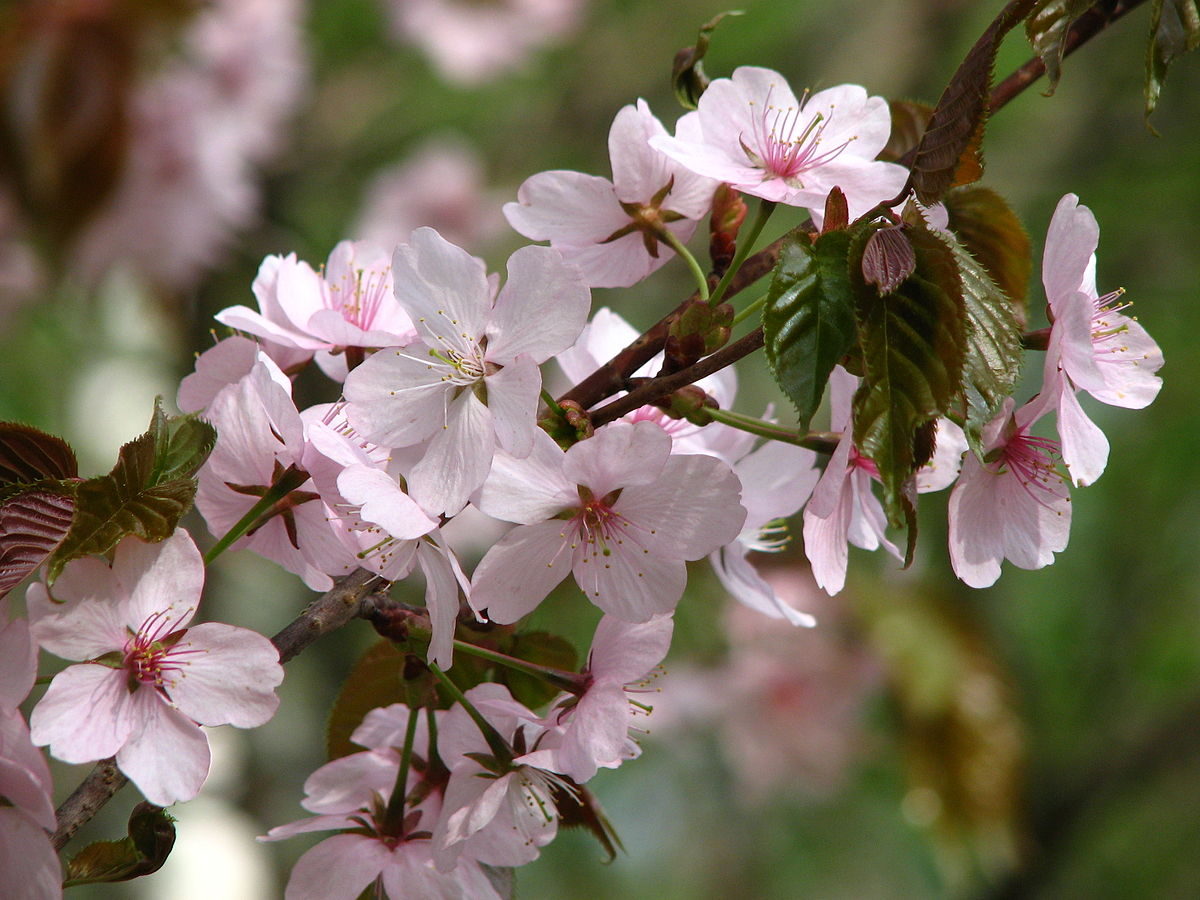

In [9]:
test = list(data_dir.glob('벚나무/*'))
PIL.Image.open(str(test[0]))

In [10]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9073 files belonging to 30 classes.
Using 7259 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9073 files belonging to 30 classes.
Using 1814 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['각시붓꽃', '국화', '꽃아까시나무', '꽃향유', '노루귀', '노루오줌', '단풍나무', '동백나무', '목련', '무궁화', '물봉선', '밤나무', '버드나무', '벚나무', '봉선화', '산딸나무', '소나무', '수국', '수선화', '은방울꽃', '은행나무', '작약', '진달래', '참나리', '측백나무', '층꽃나무', '토끼풀', '패랭이꽃', '할미꽃', '해바라기']


## 한글이 깨져서 안나와서 주피터에 글꼴 설치

In [20]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [21]:
!ls -l /usr/share/fonts/truetype/

total 4
drwxr-xr-x 2 root root 4096 Jun 14 14:21 nanum


In [22]:
!rm -rf ~/.cache/matplotlib/*

In [23]:
import matplotlib    
import matplotlib.font_manager

print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams["font.family"] = 'NanumGothic'

['STIXGeneral', 'STIXSizeOneSym', 'DejaVu Serif', 'cmtt10', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmsy10', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXSizeFourSym', 'cmss10', 'STIXGeneral', 'STIXSizeOneSym', 'DejaVu Serif', 'cmb10', 'cmmi10', 'STIXSizeFiveSym', 'STIXSizeTwoSym', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans Display', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Serif Display', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Sans Mono', 'cmr10', 'cmex10', 'NanumBarunGothic', 'NanumMyeongjo', 'NanumMyeongjo', 'NanumGothic', 'NanumGothic', 'NanumSquare', 'NanumSquare', 'NanumBarunGothic', 'NanumSquareRound', 'NanumSquareRound']


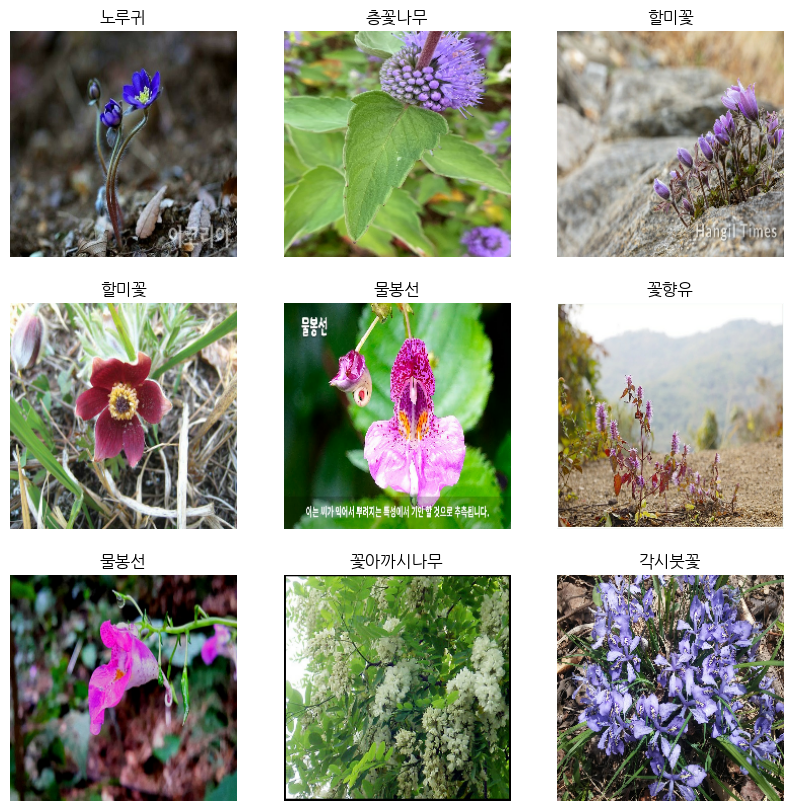

In [24]:
import matplotlib.pyplot as plt
# 왜 matplot 임포트가 안되는지 모르겠네요... 원래 잘됬는데 한글 글꼴 받는다고 좀 건드리다가 rc 관련한게 바뀐건지 임포트가 안됩니다..
# matplotlib만 pip로 지웠다 다시 까니까 제대로 되네요

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

# 데이터 표준화, 성능을 높이도록 데이터세트 구성

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# 1. CNN으로 임시 모델 테스트
- 데이터셋이 잘 되었는지 확인용으로 cnn 하나 가져와서 테스트했습니다.
- 데이터 증강 + 드롭아웃 적용
- 근데 왜 데이터 증강이 안돼죠??? 이미지가 똑같은데
- training=True 안넣어줘서 그랬네요 레이어에 들어가는 부분이어서 학습할때만 활성화되는 함수

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.RandomCrop(height=224, width=224)
  ]
)

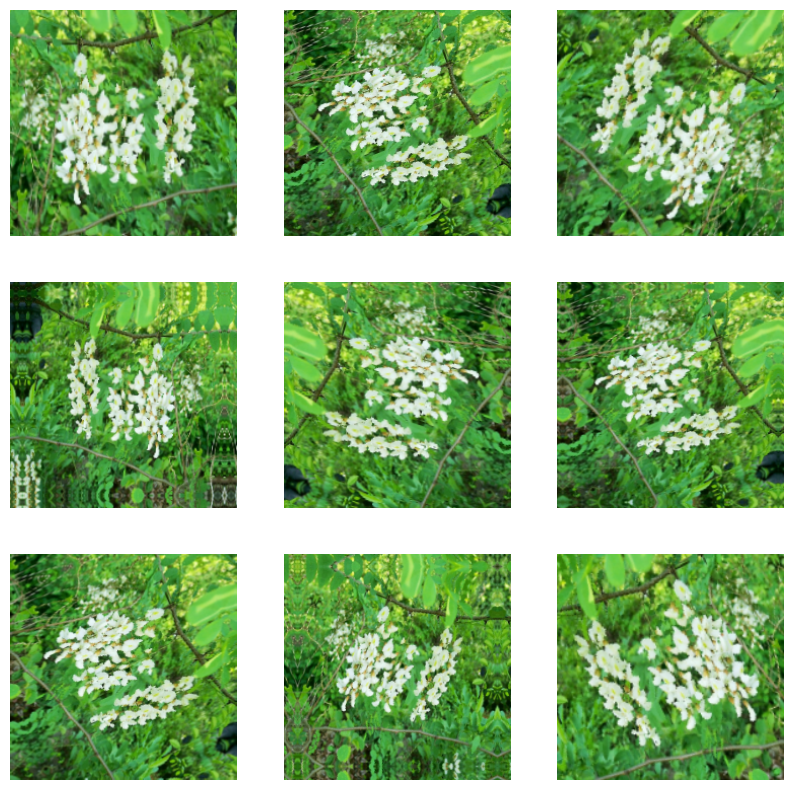

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images, training=True)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    
plt.show()

In [21]:
num_classes = 30

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
227/227 [==============================] - 25s 91ms/step - loss: 2.6286 - accuracy: 0.2476 - val_loss: 2.1615 - val_accuracy: 0.3666
Epoch 2/10
227/227 [==============================] - 11s 49ms/step - loss: 2.0399 - accuracy: 0.3928 - val_loss: 1.9228 - val_accuracy: 0.4449
Epoch 3/10
227/227 [==============================] - 11s 49ms/step - loss: 1.8650 - accuracy: 0.4437 - val_loss: 1.8072 - val_accuracy: 0.4625
Epoch 4/10
227/227 [==============================] - 11s 48ms/step - loss: 1.7373 - accuracy: 0.4765 - val_loss: 1.6539 - val_accuracy: 0.5176
Epoch 5/10
227/227 [==============================] - 11s 48ms/step - loss: 1.6332 - accuracy: 0.5096 - val_loss: 1.6911 - val_accuracy: 0.5193
Epoch 6/10
227/227 [==============================] - 11s 49ms/step - loss: 1.5541 - accuracy: 0.5346 - val_loss: 1.5954 - val_accuracy: 0.5413
Epoch 7/10
227/227 [==============================] - 11s 49ms/step - loss: 1.4566 - accuracy: 0.5625 - val_loss: 1.6630 - val_accuracy:

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

### 그냥 CNN 이고 과적합은 안일어나는데 정확도가 너무 낮네요...

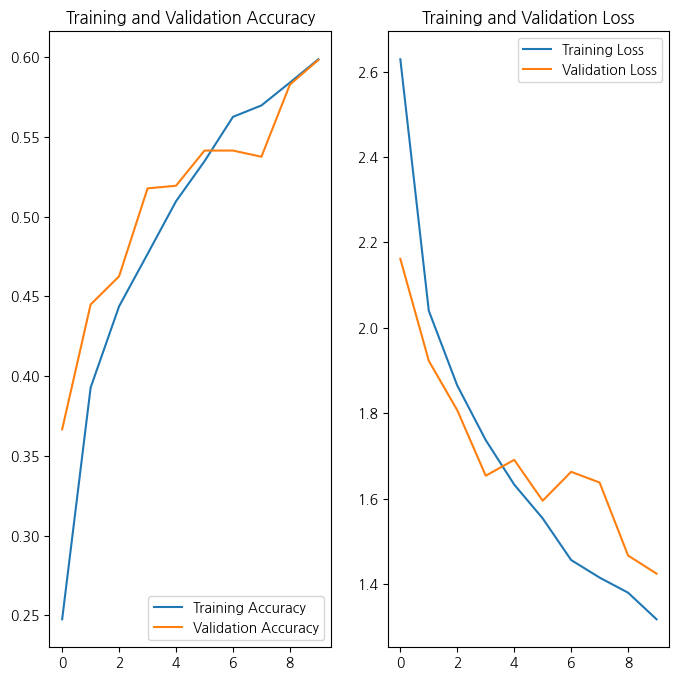

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 2. ResNet

In [27]:
def graph():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# # Create a data augmentation stage with horizontal flipping, rotations, zooms
# data_augmentation = keras.Sequential(
#     [
#         layers.experimental.preprocessing.RandomFlip("horizontal"),
#         layers.experimental.preprocessing.RandomRotation(0.1),
#         layers.experimental.preprocessing.RandomZoom(0.1),
#     ]
# )

# # Create a model that includes the augmentation stage
# input_shape = (224, 224, 3)
# classes = 30
# inputs = keras.Input(shape=input_shape)
# # Augment images
# x = data_augmentation(inputs)
# # Rescale image values to [0, 1]
# x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# # Add the rest of the model
# outputs = keras.applications.ResNet50(
#     weights=None, input_shape=input_shape, classes=classes
# )(x)
# model = keras.Model(inputs, outputs)

#..........................
# 2번 방법

i = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
x = tf.cast(i, tf.float32)
x = tf.keras.applications.resnet50.preprocess_input(x)
core=tf.keras.applications.ResNet50(weights=None,classes=30)
x=core(x)

model = tf.keras.Model(inputs=[i], outputs=[x])

# .......................
# 3번방법

# model=keras.applications.resnet.ResNet50(weights=None, input_tensor=keras.layers.Input(shape=(224,224,3)), classes=30)

model.summary()

epochs=20
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_4 (TFOpLambda)      (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem_4   (None, 224, 224, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_4 (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 30)                23649182  
                                                                 
Total params: 23,649,182
Trainable params: 23,596,062
Non-t

### augmentation 없이 돌리니까 과적합이 좀 나네요

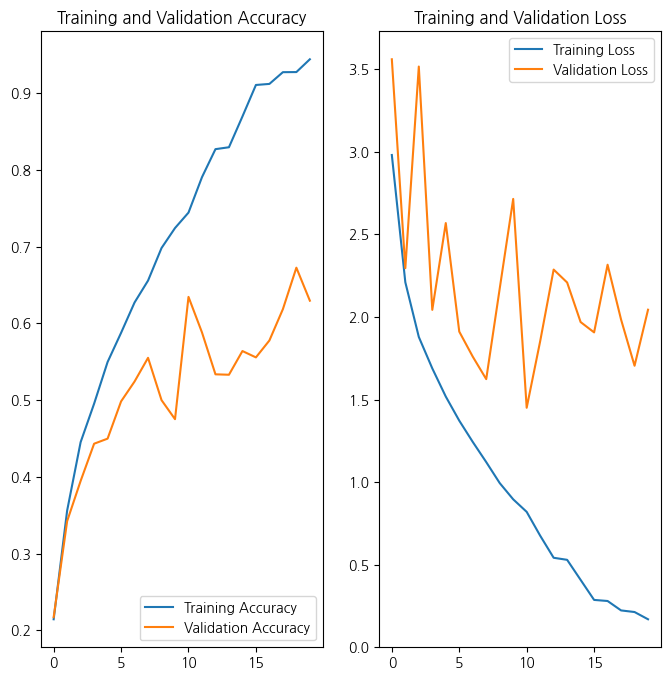

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

# Create a model that includes the augmentation stage
input_shape = (224, 224, 3)
classes = 30
inputs = keras.Input(shape=input_shape)
# Augment images
x = data_augmentation(inputs)
# Rescale image values to [0, 1]
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
outputs = keras.applications.ResNet50(
    weights=None, input_shape=input_shape, classes=classes
)(x)
model = keras.Model(inputs, outputs)

#..........................
# 2번 방법

# i = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
# x = tf.cast(i, tf.float32)
# x = tf.keras.applications.resnet50.preprocess_input(x)
# core=tf.keras.applications.ResNet50(weights=None,classes=30)
# x=core(x)

# model = tf.keras.Model(inputs=[i], outputs=[x])

# .......................
# 3번방법

# model=keras.applications.resnet.ResNet50(weights=None, input_tensor=keras.layers.Input(shape=(224,224,3)), classes=30)

model.summary()

epochs=40
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 30)                23649182  
                                                                 
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/40
227/227 [==============================] - 90s 367ms/step - loss: 3.1202 - accuracy: 0.1926 - val_loss: 3.7003 - val_accuracy: 0.1020
Epoch 2/40
227/227 [=========

### augmentation 주고 epochs 40으로 늘렸습니다 
근데 validation 정확도가 너무 낮네요 조금 오버피팅도 나는거 같고

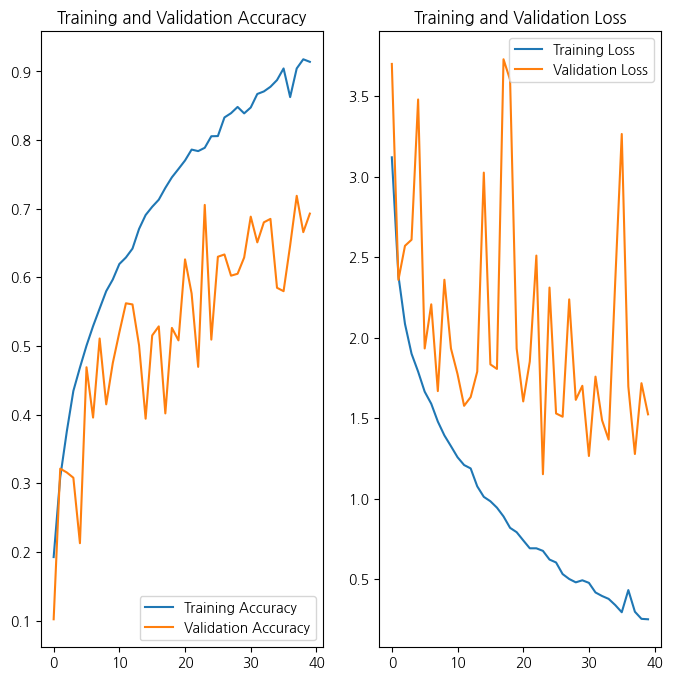

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### augmentation 조금 더 주고 optimizer SGD로 변경

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

# Create a model that includes the augmentation stage
input_shape = (224, 224, 3)
classes = 30
inputs = keras.Input(shape=input_shape)
# Augment images
x = data_augmentation(inputs)
# Rescale image values to [0, 1]
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
outputs = keras.applications.ResNet50(
    weights=None, input_shape=input_shape, classes=classes
)(x)
model = keras.Model(inputs, outputs)

#..........................
# 2번 방법

# i = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
# x = tf.cast(i, tf.float32)
# x = tf.keras.applications.resnet50.preprocess_input(x)
# core=tf.keras.applications.ResNet50(weights=None,classes=30)
# x=core(x)

# model = tf.keras.Model(inputs=[i], outputs=[x])

# .......................
# 3번방법

# model=keras.applications.resnet.ResNet50(weights=None, input_tensor=keras.layers.Input(shape=(224,224,3)), classes=30)

model.summary()

epochs=40
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='SGD') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 30)                23649182  
                                                                 
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/40
227/227 [==============================] - 87s 363ms/step - loss: 3.3103 - accuracy: 0.1362 - val_loss: 3.3047 - val_accuracy: 0.0981
Epoch 2/40
227/227 [=========

더심해졌네여...

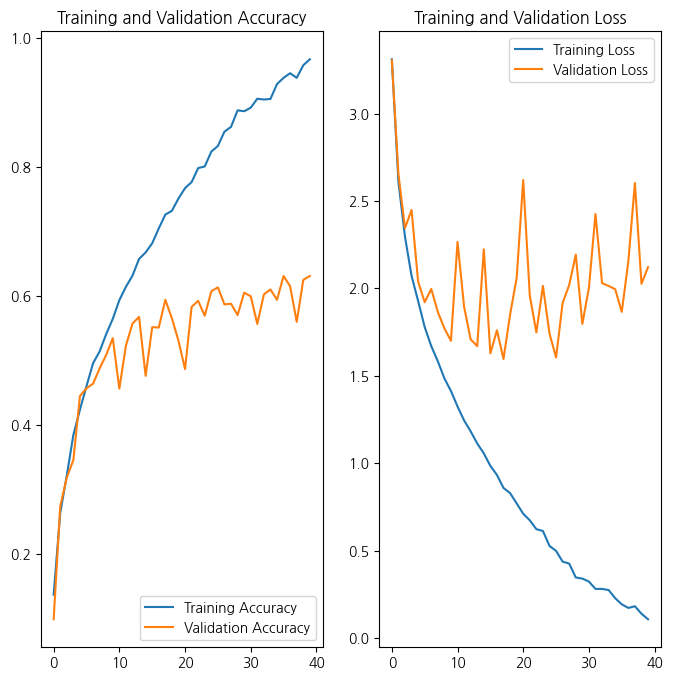

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Adagrad

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

# Create a model that includes the augmentation stage
input_shape = (224, 224, 3)
classes = 30
inputs = keras.Input(shape=input_shape)
# Augment images
x = data_augmentation(inputs)
# Rescale image values to [0, 1]
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
outputs = keras.applications.ResNet50(
    weights=None, input_shape=input_shape, classes=classes
)(x)
model = keras.Model(inputs, outputs)

#..........................
# 2번 방법

# i = tf.keras.layers.Input([224, 224, 3], dtype = tf.uint8)
# x = tf.cast(i, tf.float32)
# x = tf.keras.applications.resnet50.preprocess_input(x)
# core=tf.keras.applications.ResNet50(weights=None,classes=30)
# x=core(x)

# model = tf.keras.Model(inputs=[i], outputs=[x])

# .......................
# 3번방법

# model=keras.applications.resnet.ResNet50(weights=None, input_tensor=keras.layers.Input(shape=(224,224,3)), classes=30)

model.summary()

epochs=40
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='Adagrad') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 30)                23649182  
                                                                 
Total params: 23,649,182
Trainable params: 23,596,062
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/40
227/227 [==============================] - 89s 367ms/step - loss: 3.1841 - accuracy: 0.1054 - val_loss: 3.6319 - val_accuracy: 0.0645
Epoch 2/40
227/227 [========

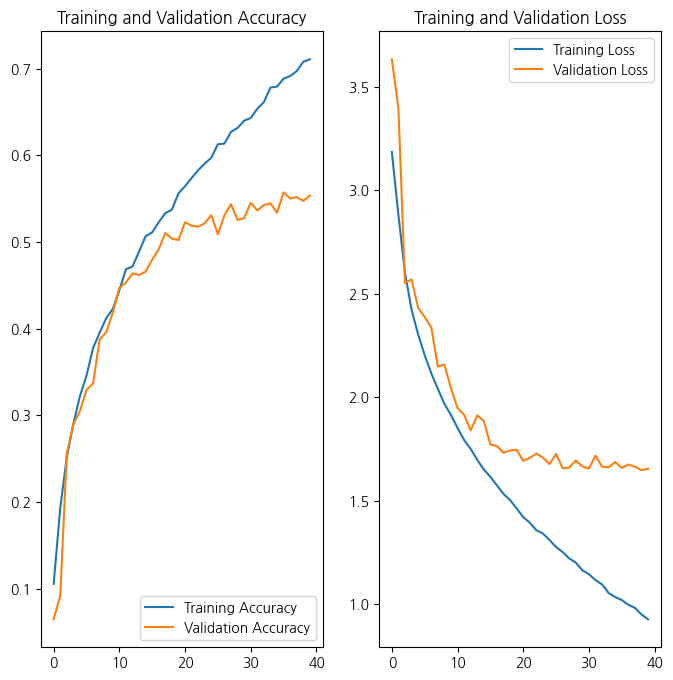

In [48]:
graph()

## ResNet152V2으로 변경하고 100epoch 돌리기

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, 30)                58393118  
                                                                 
Total params: 58,393,118
Trainable params: 58,249,374
Non-trainable params: 143,744
_________________________________________________________________
Epoch 1/40
227/227 [==============================] - 198s 802ms/step - loss: 2.8365 - accuracy: 0.1851 - val_loss: 8.3921 - val_accuracy: 0.0573
Epoch 2/40
227/227 [=======

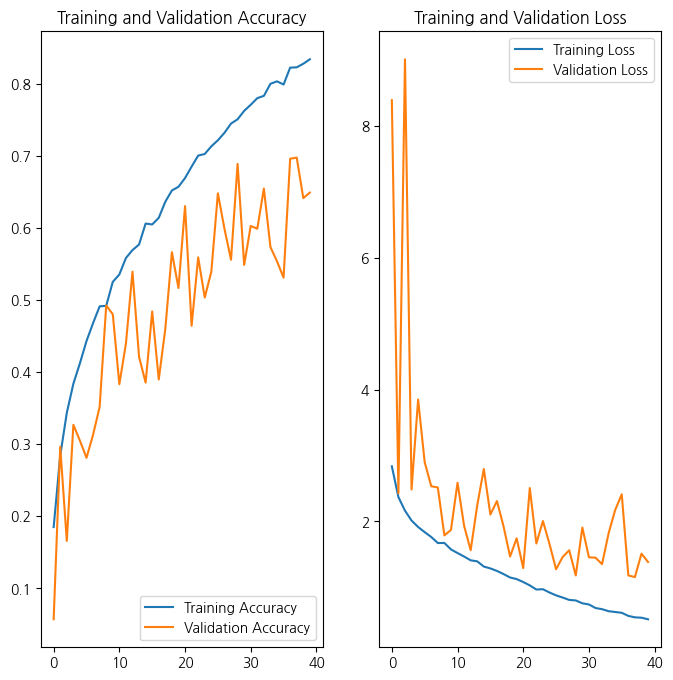

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.RandomCrop(height=224, width=224)
    ]
)

# Create a model that includes the augmentation stage
input_shape = (224, 224, 3)
classes = 30
inputs = keras.Input(shape=input_shape)
# Augment images
x = data_augmentation(inputs)
# Rescale image values to [0, 1]
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
outputs = keras.applications.ResNet152V2(
    weights=None, input_shape=input_shape, classes=classes, classifier_activation='softmax'
)(x)
model = keras.Model(inputs, outputs)

model.summary()

epochs=40
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

graph()

In [31]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
    initial_epoch = 40, epochs = 60
)
# graph()

Epoch 41/60
227/227 [==============================] - 176s 774ms/step - loss: 0.4838 - accuracy: 0.8407 - val_loss: 1.8320 - val_accuracy: 0.6323
Epoch 42/60
227/227 [==============================] - 180s 795ms/step - loss: 0.4725 - accuracy: 0.8452 - val_loss: 1.4107 - val_accuracy: 0.6472
Epoch 43/60
227/227 [==============================] - 181s 796ms/step - loss: 0.4446 - accuracy: 0.8552 - val_loss: 2.1857 - val_accuracy: 0.6053
Epoch 44/60
227/227 [==============================] - 180s 795ms/step - loss: 0.4047 - accuracy: 0.8647 - val_loss: 1.8473 - val_accuracy: 0.5992
Epoch 45/60
227/227 [==============================] - 180s 795ms/step - loss: 0.4017 - accuracy: 0.8695 - val_loss: 1.4284 - val_accuracy: 0.6615
Epoch 46/60
227/227 [==============================] - 180s 795ms/step - loss: 0.3767 - accuracy: 0.8720 - val_loss: 1.2313 - val_accuracy: 0.7354
Epoch 47/60
227/227 [==============================] - 180s 795ms/step - loss: 0.3482 - accuracy: 0.8857 - val_loss: 1

ValueError: x and y must have same first dimension, but have shapes (40,) and (20,)

In [33]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
    initial_epoch = 60, epochs = 80
)
# graph()

Epoch 61/80
227/227 [==============================] - 175s 773ms/step - loss: 0.1776 - accuracy: 0.9394 - val_loss: 1.6703 - val_accuracy: 0.6880
Epoch 62/80
227/227 [==============================] - 180s 794ms/step - loss: 0.1933 - accuracy: 0.9370 - val_loss: 2.1952 - val_accuracy: 0.6384
Epoch 63/80
227/227 [==============================] - 180s 794ms/step - loss: 0.2062 - accuracy: 0.9319 - val_loss: 1.5947 - val_accuracy: 0.6996
Epoch 64/80
227/227 [==============================] - 180s 794ms/step - loss: 0.1776 - accuracy: 0.9388 - val_loss: 1.5560 - val_accuracy: 0.7078
Epoch 65/80
227/227 [==============================] - 180s 794ms/step - loss: 0.1650 - accuracy: 0.9463 - val_loss: 1.3591 - val_accuracy: 0.7459
Epoch 66/80
227/227 [==============================] - 180s 794ms/step - loss: 0.1731 - accuracy: 0.9403 - val_loss: 1.4579 - val_accuracy: 0.7084
Epoch 67/80
227/227 [==============================] - 180s 794ms/step - loss: 0.1594 - accuracy: 0.9467 - val_loss: 1

In [34]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
    initial_epoch = 80, epochs = 90
)
# graph()

Epoch 81/90
227/227 [==============================] - 175s 772ms/step - loss: 0.1385 - accuracy: 0.9521 - val_loss: 1.8346 - val_accuracy: 0.7106
Epoch 82/90
227/227 [==============================] - 180s 793ms/step - loss: 0.1179 - accuracy: 0.9589 - val_loss: 2.4719 - val_accuracy: 0.6450
Epoch 83/90
227/227 [==============================] - 180s 793ms/step - loss: 0.1008 - accuracy: 0.9661 - val_loss: 2.2147 - val_accuracy: 0.6786
Epoch 84/90
227/227 [==============================] - 180s 794ms/step - loss: 0.1053 - accuracy: 0.9667 - val_loss: 1.5248 - val_accuracy: 0.7359
Epoch 85/90
227/227 [==============================] - 180s 793ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 1.7270 - val_accuracy: 0.7282
Epoch 86/90
227/227 [==============================] - 180s 793ms/step - loss: 0.0811 - accuracy: 0.9731 - val_loss: 2.1645 - val_accuracy: 0.6963
Epoch 87/90
227/227 [==============================] - 180s 793ms/step - loss: 0.1443 - accuracy: 0.9529 - val_loss: 2

In [35]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
    initial_epoch = 90, epochs = 100
)
# graph()

Epoch 91/100
227/227 [==============================] - 175s 771ms/step - loss: 0.0840 - accuracy: 0.9738 - val_loss: 1.6419 - val_accuracy: 0.7282
Epoch 92/100
227/227 [==============================] - 180s 793ms/step - loss: 0.0722 - accuracy: 0.9784 - val_loss: 2.2904 - val_accuracy: 0.7133
Epoch 93/100
227/227 [==============================] - 180s 793ms/step - loss: 0.1030 - accuracy: 0.9679 - val_loss: 2.0020 - val_accuracy: 0.7144
Epoch 94/100
227/227 [==============================] - 180s 793ms/step - loss: 0.0835 - accuracy: 0.9727 - val_loss: 2.5187 - val_accuracy: 0.6676
Epoch 95/100
227/227 [==============================] - 180s 793ms/step - loss: 0.1452 - accuracy: 0.9566 - val_loss: 1.9600 - val_accuracy: 0.7040
Epoch 96/100
227/227 [==============================] - 180s 793ms/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 1.6136 - val_accuracy: 0.7563
Epoch 97/100
227/227 [==============================] - 180s 794ms/step - loss: 0.0753 - accuracy: 0.9762 - val_

In [36]:
model.save("ResNet152V2_6_18")

INFO:tensorflow:Assets written to: ResNet152V2_6_18/assets


INFO:tensorflow:Assets written to: ResNet152V2_6_18/assets


# 결론
- 그래프를 그리려고 했는데 매번 history를 재정의해서 마지막꺼만 불러지네요...

- 그리고 epoch을 늘려서 오래 학습해봤는데도 검증 정확도가 최대 75%입니다

- 일단 ResNet152V2 정확도 75% 버전 6.18날짜로 모델만 저장해두었습니다.

- 데이터셋에 정확하지 않은 사진들을 한번 더 걸러야 될것같아요. 그리고 과적합 안나게 수정 계속 할 예정입니다.